In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import preprocessing
from sklearn import decomposition

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df['MEDV'] = boston.target

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

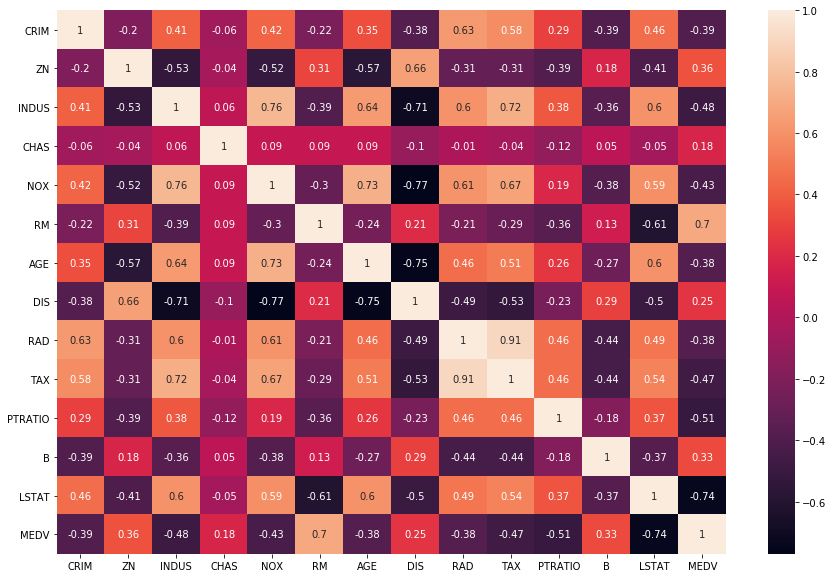

In [10]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df.corr().round(2), annot = True)
plt.show()

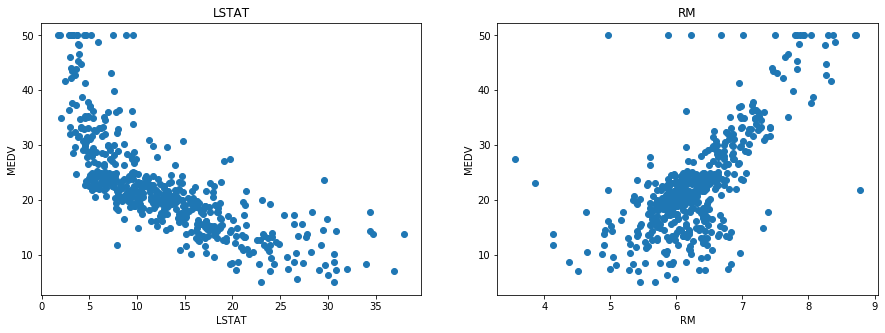

In [11]:
#LSTAT and RM have the highest correlation coeffeient with target MEDV, -0.74 and 0.7 respectively
#Thus, LSTAT and RM are chosen as the features for linear regression


plt.figure(figsize=(15, 5))

feature1 = df['LSTAT']
feature2 = df['RM']
target = df['MEDV']

plt.subplot(1,2,1)
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.scatter(feature1,target)
plt.subplot(1,2,2)
plt.title('RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(feature2,target)

In [12]:
X = pd.DataFrame(feature1, columns = ['LSTAT'])
X['RM'] = feature2
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [13]:
Y = target
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(Y_train,y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(Y_test,y_pred_test)))

r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)

print("RMSE training score : %.2f" %rmse_train)
print("R2 training score : %2f" %r2_train)
print("RMSE testing score : %.2f" %rmse_test)
print("R2 testing score : %2f" %r2_test)

RMSE training score : 5.49
R2 training score : 0.629349
RMSE testing score : 5.70
R2 testing score : 0.663125


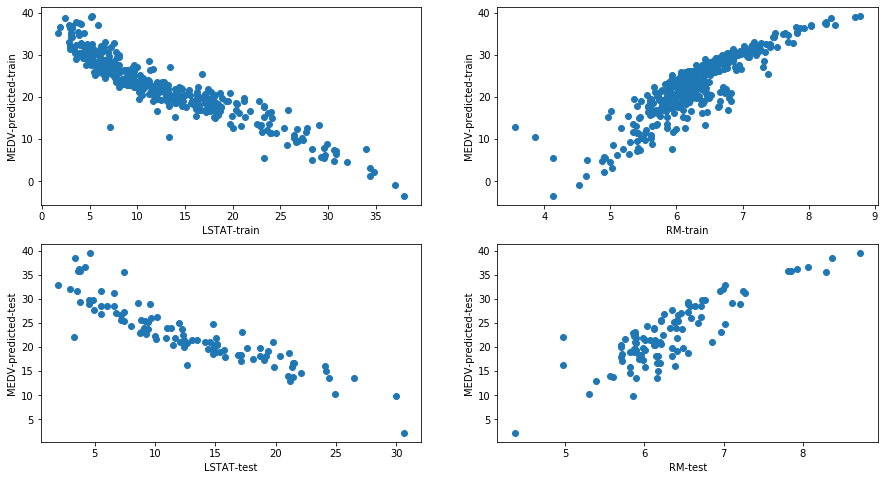

In [16]:
plt.figure(figsize=(15, 8))


plt.subplot(2,2,1)

plt.xlabel('LSTAT-train')
plt.ylabel('MEDV-predicted-train')
plt.scatter(X_train.LSTAT,y_pred_train)
plt.subplot(2,2,2)

plt.xlabel('RM-train')
plt.ylabel('MEDV-predicted-train')
plt.scatter(X_train.RM,y_pred_train)

plt.subplot(2,2,3)

plt.xlabel('LSTAT-test')
plt.ylabel('MEDV-predicted-test')
plt.scatter(X_test.LSTAT,y_pred_test)
plt.subplot(2,2,4)

plt.xlabel('RM-test')
plt.ylabel('MEDV-predicted-test')
plt.scatter(X_test.RM,y_pred_test)

In [17]:
############ Using PCA ###########

X_new = df.iloc[:,0:13]
Y_new = df.iloc[:,-1]


In [18]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_new)
X_scaled_array = scaler.transform(X_new)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_new.columns)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [19]:
pca = decomposition.PCA(n_components = 1)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

In [20]:
dfpc = pd.DataFrame(X_pca_array, columns=['PC'])
dfpc['MEDV'] = Y_new
dfpc.head()

,PC,MEDV
0,-2.098297,24.0
1,-1.457252,21.6
2,-2.074598,34.7
3,-2.611504,33.4
4,-2.458185,36.2


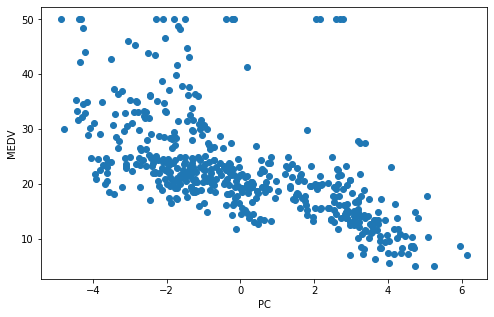

In [21]:
plt.figure(figsize=(8, 5))
plt.xlabel('PC')
plt.ylabel('MEDV')
plt.scatter(dfpc.PC,dfpc.MEDV)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(dfpc.PC, dfpc.MEDV, test_size = 0.2, random_state=100)

In [23]:
X_train = (np.array(X_train)).reshape(-1, 1)
Y_train = (np.array(Y_train)).reshape(-1, 1)
X_test = (np.array(X_test)).reshape(-1, 1)
Y_test = (np.array(Y_test)).reshape(-1, 1)

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(Y_train,y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(Y_test,y_pred_test)))

r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)

print("RMSE training score : %.2f" %rmse_train)
print("R2 training score : %2f" %r2_train)
print("RMSE testing score : %.2f" %rmse_test)
print("R2 testing score : %2f" %r2_test)

RMSE training score : 7.12
R2 training score : 0.376996
RMSE testing score : 7.84
R2 testing score : 0.364013


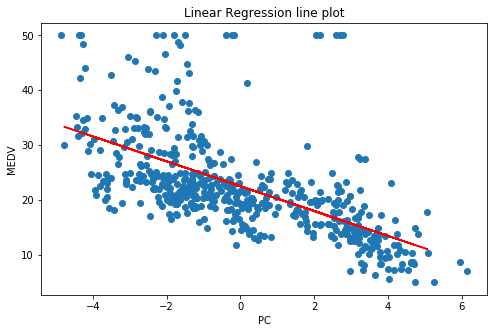

In [25]:
plt.figure(figsize=(8, 5))
plt.xlabel('PC')
plt.ylabel('MEDV')
plt.title('Linear Regression line plot')
plt.scatter(dfpc.PC,dfpc.MEDV)
plt.plot(X_test,y_pred_test, color='red')
